<a href="https://colab.research.google.com/github/haechis/ML_trial/blob/main/ML_trial_04_02_%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#04-2 확률적 경사 강하법


점진적인 학습

훈련 데이터가 한 번에 준비되는 것이 아니라 조금씩 전달되는 경우 확률적 경사 강하법 (Stochastic Gradient Descent) 기법 사용

# 확률적 경사 하강법
- 조금씩 가장 가파른 길을 내려오며, 최적을 찾는 모델 훈련법
- 확률적: 랜덤하게 샘플 데이터를 취득
- 확률적 경사 하강법: 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려감 -> 랜덤하게 다른 샘플 선택하여 경사를 내려감 -> 전체 샘플을 할 때까지 반복
- 미니배치 하강법: 샘플을 여러 개 사용
- 배치 경사 하강법: 전체 샘플 사용

# 손실 함수
- 손실 함수(Loss function): 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 지표로써, 손실 함수의 값이 작을수록 좋음. 하지만, 어떤값이 최소인지 알기 어려움. 가능한 많이 찾아보고 만족할 수준이면 최소값으로 인정

# 로지스틱 손실 함수

샘플의 예측과 타깃이 아래와 같을 때,

<No.> <예측> <타겟>

1,      0.9,      1

2,      0.3,      1

3,      0.2,      0

4,      0.8,      0

손실 함수는 다음과 같이 계산 한다.
1. 0.9 * 1 -> negative -> -0.9
2. 0.3 * 1 -> negative -> -0.3
3. (1-0.2) * 1 -> negative -> -0.8
4. (1-0.8) * 1 -> negative -> -0.2

1번, 3번 클래스는 손실이 낮고 2번, 4번 클래스는 손실이 높다.
사실, 손실 함수로 로그함수를 적요하면 더 좋습니다. 왜냐하면, 로그 함수는 0에 가까울수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있기 때문입니다.

## 즉, 손실함수를
<양성 클래스 (타겟 = 1)>

-log(예측 확률)

<음성 클래스 (타겟 = 0)>

-log(1-예측 확률)

In [1]:
## Stochastic Gradient Descent Classifier.

# fish_csv_data 파일에서 판다스 데이터프레임 만들기.
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
# Species 열을 제외한 나머지 5개는 입력 데이터로 사용.
# Species 열은 target이 된다.
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
# 훈련 세트와 테스트 세트로 split.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [7]:
# 훈련 세트와 테스트 세트의 특성을 "표준화 전처리"
# 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환 해야 함!!
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
## Stochastic Gradient Descent Classifier : SGDClassifier (from sklearn)
from sklearn.linear_model import SGDClassifier

In [8]:
# SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정. loss는 손실 함수의 종류를 지정. (loss를 log함수로 하려면 loss = 'log')
# max_iter 지정
# 훈련 세트와 테스트 세트에서 정확도 점수 출력
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [10]:
# 확률적 경사 하강법은 점진적 학습이 가능하다.
# SGDClassifier 객체를 다시 만들지 않고 훈련 sc를 추가로 더 훈련해 보자
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


In [11]:
# (한 번 더 해보자.)
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

# 이 부분은 교제에는 나와있지 않다.
# 결과가 더 나빠진다.

0.7815126050420168
0.8


# 에포크와 과대/과소적합.

## 과소적합
- 에포크가 적으면 모델이 훈련 세트를 덜 학습

## 과대적합
- 너무 많은 에포크 횟수 동안 훈련한 모델은 훈련 세트에 너무 잘 맞아 세트스 세트에는 오히려 점수가 나쁠 수 있음.

## 조기 종료 early stopping
과대적합이 시작하기 전에 훈련을 멈추는 것.

In [13]:
## 조기 종료.
# partial_fit() 메서드만 사용하여 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달한다.
# np.unique 이용하여 train_target의 7개 생선 목록을 만든다.
# 리스트 두 개를 생성하여 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록한다.
import numpy as np
sc = SGDClassifier(loss = 'log', random_state= 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [14]:
# 300 번 에포크 동안 훈련 반복하여 스코어링 해보자.
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

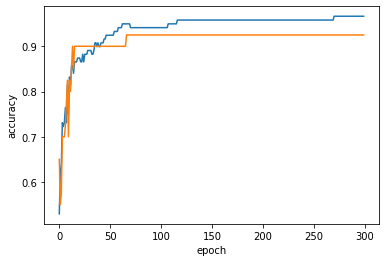

In [16]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 초기에는 과서적합이 발생한다.
# 대략 100 에폭 이후에는 훈련/테스트 점수가 점점 벌어진다.

In [17]:
# 반복을 100으로 하고 다시.
# 원래 SGDClassifier는 일정 에폭 동안 성능 향상 되지 않으면 자동으로 멈춘다. 이를 방지하고, 100 에폭 다 돌기 위하여 tol = None 해준다.
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925
